In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.weightstats
import math

In [2]:
fs = open("query_and_blast.fa","r")
DNA_seq=[]
seq1=0
for line in fs:
    if ">" in line:
#         print('stop')
        if seq1!=0:
            DNA_seq.append(seq1)
        seq1=[]
        seq1.append(line.split('\n')[0])
        seq1.append('')
    else:
#         print(line.split('\n')[0])
        seq1[1]=seq1[1]+line.split('\n')[0]

DNA_seq.append(seq1)    
fs.close()
len(DNA_seq)


1001

In [3]:
fs2 = open("alignment.fa","r")
align_seq=[]
seq2=0
count=0
for line in fs2:
    
    if ">" in line:
        count+=1
        if seq2!=0:
            align_seq.append(seq2)
        seq2=[]
        seq2.append(line.split('\n')[0])
        seq2.append('')
    else:
        seq2[1]=seq2[1]+line.split('\n')[0]
    
fs2.close()
align_seq.append(seq2)
print(len(align_seq))
print(count)

1001
1001


In [4]:
back_DNA_seq=[]
for DNA,align in zip(DNA_seq,align_seq):

    new_seq=""
    n=0
    for AA in align[1]:
        if AA == "-":
            new_seq+='---'
            
        else:
            new_seq+=DNA[1][n:n+3]
            n+=3
            
            

            
    back_DNA_seq.append([DNA[0],new_seq])
len(back_DNA_seq)     

1001

In [5]:
# back_DNA_seq[0]

In [6]:
# back_DNA_seq[1]

In [7]:
# align_seq[1]

In [8]:
query_DNA=back_DNA_seq[0][1]
# print(query_DNA)
query_protein=align_seq[0][1]
changelist=[]
for condon_num in range(len(query_protein)):
# for condon_num in range(100):
    dS=0
    dN=0
    no_mut=0
    query_condon=query_DNA[condon_num*3:condon_num*3+3]
    query_AA=query_protein[condon_num]
#     print(query_condon)
    if query_AA !='-':
#         print(condon_num)
        for DNA_title_seq,protein_title_seq in zip(back_DNA_seq[2:],align_seq[2:]):
#             gene_name=DNA_title_seq[0]
            DNA_seq=DNA_title_seq[1]
            pretein_seq=protein_title_seq[1]
            condon=DNA_seq[condon_num*3:condon_num*3+3]
            AA=pretein_seq[condon_num]

            if condon==query_condon:
                no_mut+=1
            if condon!=query_condon:
                if AA == query_AA:
                    dS+=1
                else:
    #                 print(condon_num)
                    dN+=1
        changelist.append([condon_num,query_condon,dS,dN,no_mut])
            
    
                
changelist                
            
change_df=pd.DataFrame(np.array(changelist ),columns=['pos','codon','dS', 'dN', 'no_mut'])        
change_df.drop(change_df[change_df['no_mut'] == 1011].index, inplace = True) 
change_df['dS'] = change_df['dS'].astype(int)    
change_df['dN'] = change_df['dN'].astype(int)    
change_df['no_mut'] = change_df['no_mut'].astype(int)    
change_df['pos'] = change_df['pos'].astype(int)    

# change_df

In [9]:
change_df['D']=change_df['dN']-change_df['dS']
change_df['dN/dS']=change_df['dN']/change_df['dS']


# change_df

In [10]:
D_std=np.std(change_df['D'])
D_std

342.98854593351314

In [11]:
change_df['Z-score']=change_df['D']*len(change_df['D'])**0.5/D_std
# change_df

In [12]:
change_df['pval']=2*stats.norm.cdf(-1*change_df['Z-score'])
# change_df

In [13]:
change_df['Z-score_func'],change_df['pval_cunc']= statsmodels.stats.weightstats.ztest(change_df['D'], value=0)


In [14]:
change_df

,pos,codon,dS,dN,no_mut,D,dN/dS,Z-score,pval,Z-score_func,pval_cunc
0,104,ATG,630,277,92,-353,0.439683,-60.275684,2.000000,-70.094743,0.0
1,105,TCT,722,105,172,-617,0.145429,-105.354383,2.000000,-70.094743,0.0
2,106,AAG,630,268,101,-362,0.425397,-61.812458,2.000000,-70.094743,0.0
3,107,AAA,631,267,101,-364,0.423138,-62.153963,2.000000,-70.094743,0.0
4,116,CCA,628,270,101,-358,0.429936,-61.129447,2.000000,-70.094743,0.0
5,117,GGA,630,268,101,-362,0.425397,-61.812458,2.000000,-70.094743,0.0
6,118,GGG,771,107,121,-664,0.138781,-113.379757,2.000000,-70.094743,0.0
7,122,CCC,701,197,101,-504,0.281027,-86.059334,2.000000,-70.094743,0.0
8,123,GGT,804,194,1,-610,0.241294,-104.159114,2.000000,-70.094743,0.0
9,124,AAA,892,98,9,-794,0.109865,-135.577601,2.000000,-70.094743,0.0


In [50]:
plot_df=change_df
plot_df.drop(plot_df[plot_df['dS'] == 0].index, inplace = True) 
plot_df.drop(plot_df[plot_df['dN'] == 0].index, inplace = True) 

plot_df['log2_ratio']=np.log2(plot_df['dN/dS'])
# plot_df

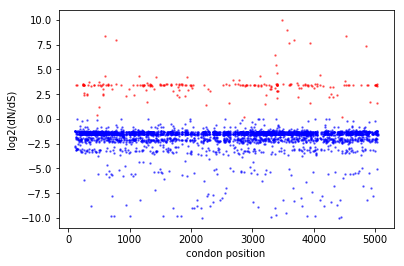

In [51]:
#plot the the codon position by the log2 ratio of dN/dS.
fig,ax=plt.subplots()
sig_df=plot_df[plot_df['pval']<0.05]
non_sig_df=plot_df[plot_df['pval']>=0.05]
plt.scatter(y=sig_df['log2_ratio'],x=sig_df['pos'],color='red',s=2,alpha=0.5)
plt.scatter(y=non_sig_df['log2_ratio'],x=non_sig_df['pos'],color='blue',s=2,alpha=0.5)
plt.ylabel('log2(dN/dS)')
plt.xlabel('condon position')
plt.show()

## Advanced question

In [52]:
codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}


In [61]:
query_DNA=back_DNA_seq[0][1]
query_protein=align_seq[0][1]
changelist=[]
for condon_num in range(len(query_protein)):
    
    Sc_up=0
    Sd=0
    Nd=0
    no_mut=0
    query_condon=query_DNA[condon_num*3:condon_num*3+3]
    query_AA=query_protein[condon_num]
    if query_AA !='-':
        for key,val in codontable.items():
            if val==query_AA:
                Sc_up+=1
        Sc=(Sc_up-1)/3
        Nc=1+1+1-Sc
        for DNA_title_seq,protein_title_seq in zip(back_DNA_seq[1:],align_seq[1:]):
            gene_name=DNA_title_seq[0]
            DNA_seq=DNA_title_seq[1]
            pretein_seq=protein_title_seq[1]
            condon=DNA_seq[condon_num*3:condon_num*3+3]
            AA=pretein_seq[condon_num]
            if condon==query_condon:
                no_mut+=1
            if condon!=query_condon:
                if AA == query_AA:
                    Sd+=1
                else:
    #                 print(condon_num)
                    Nd+=1
        if Sc!=0:
#             Sc=0.000001
            changelist.append([condon_num,Sd,Sc,Nd,Nc,no_mut])
                
# changelist                
            
change_df=pd.DataFrame(np.array(changelist ),columns=['pos','Sd','Sc','Nd','Nc', 'no_mut'])        
change_df.drop(change_df[change_df['no_mut'] == 1011].index, inplace = True) 
change_df['dN']= change_df['Nd']/change_df['Nc']
change_df['dS']= change_df['Sd']/change_df['Sc']

change_df    

,pos,Sd,Sc,Nd,Nc,no_mut,dN,dS
0,105.0,723.0,1.666667,105.0,1.333333,172.0,78.750000,433.8
1,106.0,631.0,0.333333,268.0,2.666667,101.0,100.500000,1893.0
2,107.0,632.0,0.333333,267.0,2.666667,101.0,100.125000,1896.0
3,116.0,629.0,1.000000,270.0,2.000000,101.0,135.000000,629.0
4,117.0,631.0,1.000000,268.0,2.000000,101.0,134.000000,631.0
5,118.0,772.0,1.000000,107.0,2.000000,121.0,53.500000,772.0
6,122.0,702.0,1.000000,197.0,2.000000,101.0,98.500000,702.0
7,123.0,805.0,1.000000,194.0,2.000000,1.0,97.000000,805.0
8,124.0,893.0,0.333333,98.0,2.666667,9.0,36.750000,2679.0
9,125.0,87.0,0.333333,910.0,2.666667,3.0,341.250000,261.0


In [62]:
change_df['D']=change_df['dN']-change_df['dS']
change_df['dN/dS']=change_df['dN']/change_df['dS']
D_std=np.std(change_df['D'])
change_df['Z-score']=change_df['D']*len(change_df['D'])**0.5/D_std
change_df['pval']=2*stats.norm.cdf(-1*change_df['Z-score'])
plot_df=change_df
plot_df.drop(plot_df[plot_df['dS'] == 0].index, inplace = True) 
plot_df.drop(plot_df[plot_df['dN'] == 0].index, inplace = True) 

plot_df['log2_ration']=np.log2(plot_df['dN/dS'])
plot_df

,pos,Sd,Sc,Nd,Nc,no_mut,dN,dS,D,dN/dS,Z-score,pval,log2_ration
0,105.0,723.0,1.666667,105.0,1.333333,172.0,78.750000,433.8,-355.050000,0.181535,-25.658574,2.000000e+00,-2.461678
1,106.0,631.0,0.333333,268.0,2.666667,101.0,100.500000,1893.0,-1792.500000,0.053090,-129.539486,2.000000e+00,-4.235407
2,107.0,632.0,0.333333,267.0,2.666667,101.0,100.125000,1896.0,-1795.875000,0.052809,-129.783389,2.000000e+00,-4.243085
3,116.0,629.0,1.000000,270.0,2.000000,101.0,135.000000,629.0,-494.000000,0.214626,-35.700143,2.000000e+00,-2.220101
4,117.0,631.0,1.000000,268.0,2.000000,101.0,134.000000,631.0,-497.000000,0.212361,-35.916945,2.000000e+00,-2.235407
5,118.0,772.0,1.000000,107.0,2.000000,121.0,53.500000,772.0,-718.500000,0.069301,-51.924196,2.000000e+00,-3.850990
6,122.0,702.0,1.000000,197.0,2.000000,101.0,98.500000,702.0,-603.500000,0.140313,-43.613434,2.000000e+00,-2.833275
7,123.0,805.0,1.000000,194.0,2.000000,1.0,97.000000,805.0,-708.000000,0.120497,-51.165387,2.000000e+00,-3.052932
8,124.0,893.0,0.333333,98.0,2.666667,9.0,36.750000,2679.0,-2642.250000,0.013718,-190.948791,2.000000e+00,-6.187807
9,125.0,87.0,0.333333,910.0,2.666667,3.0,341.250000,261.0,80.250000,1.307471,5.799467,6.652621e-09,0.386779


In [63]:
sig_df=plot_df[plot_df['pval']<0.05]
non_sig_df=plot_df[plot_df['pval']>=0.05]
sig_df

,pos,Sd,Sc,Nd,Nc,no_mut,dN,dS,D,dN/dS,Z-score,pval,log2_ration
9,125.0,87.0,0.333333,910.0,2.666667,3.0,341.250000,261.0,80.250000,1.307471,5.799467,6.652621e-09,0.386779
20,140.0,84.0,1.000000,914.0,2.000000,2.0,457.000000,84.0,373.000000,5.440476,26.955776,4.880881e-160,2.443733
23,143.0,254.0,1.666667,260.0,1.333333,486.0,195.000000,152.4,42.600000,1.279528,3.078595,2.079790e-03,0.355611
93,236.0,87.0,1.000000,908.0,2.000000,5.0,454.000000,87.0,367.000000,5.218391,26.522171,5.380190e-155,2.383605
101,244.0,81.0,1.000000,916.0,2.000000,3.0,458.000000,81.0,377.000000,5.654321,27.244846,1.912778e-163,2.499354
102,245.0,85.0,1.000000,912.0,2.000000,3.0,456.000000,85.0,371.000000,5.364706,26.811241,2.389597e-158,2.423499
104,247.0,83.0,0.333333,914.0,2.666667,3.0,342.750000,249.0,93.750000,1.376506,6.775078,1.243394e-11,0.461011
105,248.0,85.0,1.000000,912.0,2.000000,3.0,456.000000,85.0,371.000000,5.364706,26.811241,2.389597e-158,2.423499
106,249.0,85.0,0.666667,911.0,2.333333,4.0,390.428571,127.5,262.928571,3.062185,19.001189,1.667230e-80,1.614561
107,250.0,83.0,1.666667,913.0,1.333333,4.0,684.750000,49.8,634.950000,13.750000,45.886246,0.000000e+00,3.781360


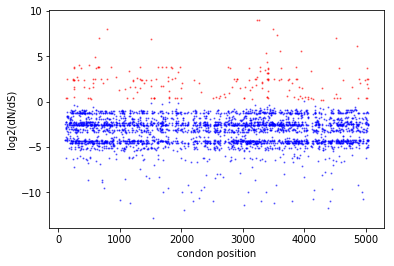

In [64]:
fig,ax=plt.subplots()

plt.scatter(y=sig_df['log2_ration'],x=sig_df['pos'],color='red',s=1,alpha=0.5)
plt.scatter(y=non_sig_df['log2_ration'],x=non_sig_df['pos'],color='blue',s=1,alpha=0.5)
plt.ylabel('log2(dN/dS)')
plt.xlabel('condon position')
plt.show()